In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

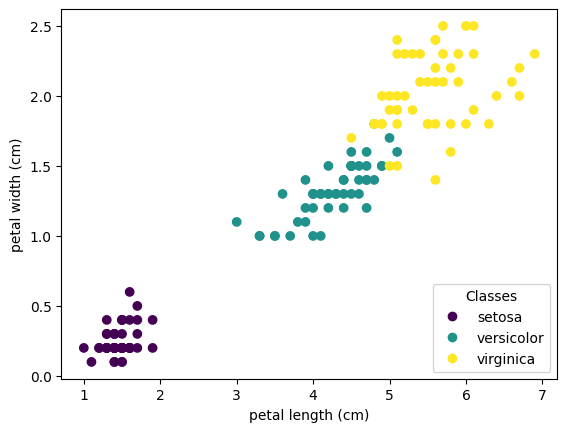

In [6]:
iris = load_iris(as_frame=True)
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[['petal length (cm)']], iris.data[['petal width (cm)']], c=iris.target)
ax.set(xlabel='petal length (cm)', ylabel='petal width (cm)')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [7]:
X = iris.data[['petal length (cm)', 'petal width (cm)']] # load petal length and width
y = iris.target
scaler = StandardScaler().set_output(transform='pandas')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # shuffle is True by default
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
X_train

,petal length (cm),petal width (cm)
114,5.1,2.4
136,5.6,2.4
53,4.0,1.3
19,1.5,0.3
38,1.3,0.2
...,...,...
17,1.4,0.3
98,3.0,1.1
66,4.5,1.5
126,4.8,1.8


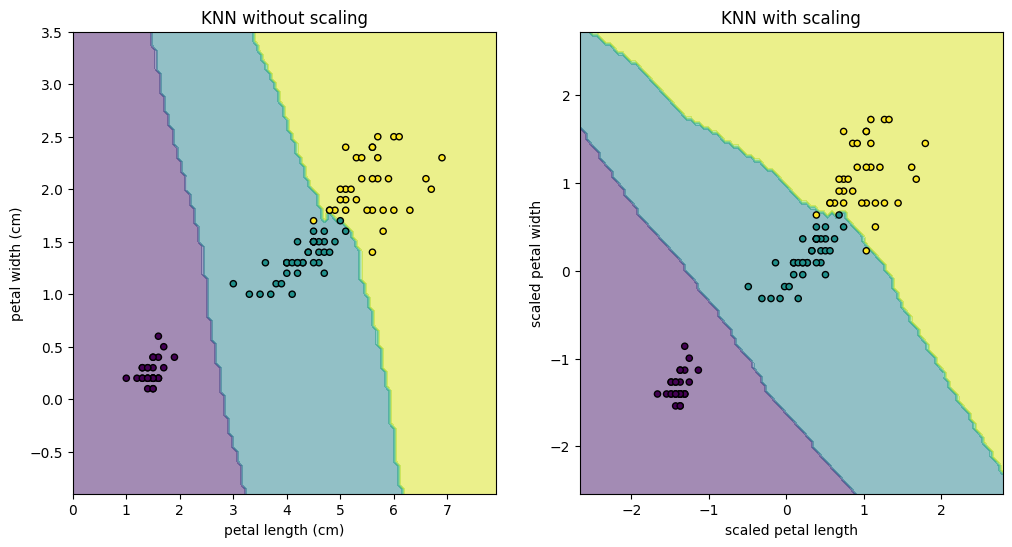

In [8]:
clf = KNeighborsClassifier(n_neighbors=5)

def fit_and_plot(X, y, clf, ax):
    clf.fit(X, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X["petal length (cm)"], X["petal width (cm)"],c=y, s=20, edgecolor="k")
    #disp.ax_.set_xlim((X["petal length (cm)"].min(), X["petal length (cm)"].max()))
    #disp.ax_.set_ylim((X["petal width (cm)"].min(), X["petal width (cm)"].max()))
    return disp.ax_

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot(X_train, y_train, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot(scaled_X_train, y_train, clf, ax2)
ax2.set_xlabel("scaled petal length")
ax2.set_ylabel("scaled petal width")
_ = ax2.set_title("KNN with scaling")

In iris database case scaling doesn't change much.

In [9]:
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f'Without scaling accuracy: {accuracy*100:.2f}%')
clf.fit(scaled_X_train, y_train)
accuracy = clf.score(scaled_X_test, y_test)
print(f'With scaling accuracy: {accuracy*100:.2f}%')

Without scaling accuracy: 95.56%
With scaling accuracy: 95.56%


In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [14]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

params = {'kneighborsclassifier__n_neighbors': [1,3,5], 'kneighborsclassifier__p': [1,2]}

grid = GridSearchCV(pipe, param_grid=params)

grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5],
                         'kneighborsclassifier__p': [1, 2]})

In [17]:
grid.cv_results_

{'mean_fit_time': array([0.00901737, 0.00521178, 0.00550585, 0.0051311 , 0.00500293,
        0.00530839]),
 'std_fit_time': array([0.00141857, 0.00032827, 0.00103539, 0.00029184, 0.00022931,
        0.00064643]),
 'mean_score_time': array([0.01120281, 0.00650144, 0.00672979, 0.00641842, 0.00643907,
        0.00660319]),
 'std_score_time': array([0.00231328, 0.00045992, 0.00058893, 0.00020554, 0.00020403,
        0.00026513]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kneighborsclassifier__p': masked_array(data=[1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'kneighborsclassifier__n_neighbors': 1,
   'kneighborsclassifier__p': 1},
  {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 2},
  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1},

In [18]:
print(f'Best params: {grid.best_params_}')

Best params: {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 1}
